In [613]:
import numpy as np
import pandas as pd
import sympy as sp
import mpmath as mp
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D
% matplotlib inline

## 1. Logistic Regression

In [614]:
# load the dataset
dataframe = pd.read_csv("machine-learning-ex2\ex2\ex2data1.txt", sep=",", header=None, names=["exam 1", "exam 2", "admissions decision"])
X, y = np.hsplit(dataframe.values, (2,))
dataframe.head()


,exam 1,exam 2,admissions decision
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### 1.1 Visualizing the data

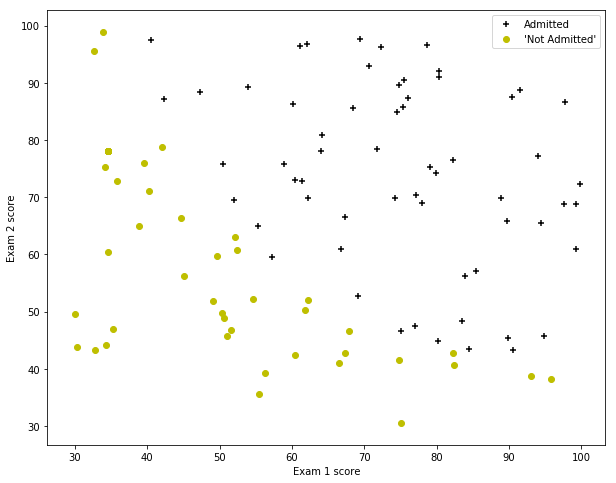

In [615]:
# Find Indices of Positive and Negative Examples
pos = np.where(y == 1)
neg = np.where(y == 0)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)

# Plot Examples
ax.scatter(X[pos, 0], X[pos, 1], marker='+', c='black', label="Admitted")
ax.scatter(X[neg, 0], X[neg, 1], marker='o', c='y', label="'Not Admitted'")
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.legend(loc="upper right")


### 1.2 Implementation

#### 1.2.1 Sigmoid function

$$
\begin{gather*}
h_{\theta}(x) = g(\theta^{\mathbf{T}}x)\\
g(z) = \frac{1}{1+e^{-z}}\\
\end{gather*}
$$

In [616]:
x = sp.Symbol("x")
# sigmoid function
expr = 1 / (1 + mp.e ** -x)
# make it as functoin
sigmoid = sp.lambdify(x, expr)


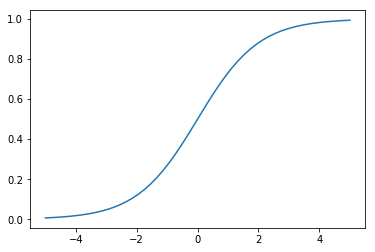

In [617]:
X_nums = np.linspace(-5, 5)
plt.plot(X_nums, sigmoid(X_nums))
plt.show()


#### 1.2.2 Cost function and gradient

$$
\begin{gather*}
J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}log(h_{\theta}(x^{(i)}))-(1-y^{(i)})log(1-h_{\theta}(x^{(i)}))\big]\\
J(\theta) = -\frac{1}{m}\big((\,log\,(g(X\theta))^{\mathbf{T}}y+(\,log\,(1-g(X\theta))^{\mathbf{T}}(1-y)\big)\\
\frac{\partial J(\theta)}{\partial\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_{j}^{(i)}\\
\theta := \theta - \frac{\alpha}{m}X^{\mathbf{T}}(g(X\theta)-\vec{y})\\
\end{gather*}
$$

In [618]:
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    return (-(np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y)) / m).item()


In [619]:
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1, 1)))
    grad = (1 / m) * X.T.dot(h - y)
    return grad.flatten()


In [620]:
X = np.column_stack((np.ones(y.size), X))
initial_theta = np.zeros((X.shape[1], 1))
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 0.6931471805599452
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


#### 1.2.3 Learning parameters using build-in functoin

In [621]:
# Set options for minimize function
# Run minimize to obtain the optimal theta
# This function will return theta and the cost
info = minimize(costFunction, initial_theta, args=(X, y), method='Newton-CG', jac=gradient, options={
    'maxiter': 400
})

# Onece it completes, you should see that the cost is about 0.203
theta_result = info["x"]
info

     fun: 0.2034977205662881
     jac: array([ -4.10111330e-06,  -4.78894551e-04,  -4.48801532e-04])
 message: 'Optimization terminated successfully.'
    nfev: 73
    nhev: 0
     nit: 28
    njev: 238
  status: 0
 success: True
       x: array([-25.15003946,   0.20614121,   0.20138039])

#### 1.2.3 Evaluating logistic regression

In [622]:
# probability predict
def ppredict(theta, X):
    return sigmoid(X.dot(theta))

def predict(theta, X, threshold=0.5):
    p = ppredict(theta, X)
    return (p > threshold).astype("int")


In [623]:
# predict for a student with an Exam 1 score of 45 and an Exam 2 score of 85
# you should expect to see an admission probability of 0.776
ppredict(theta_result, np.array([1, 45, 85]))


0.77619833685754414

In [624]:
r = predict(theta_result.reshape(-1, 1), X)
print('Train accuracy {}%'.format(np.where(r == y)[0].size / y.size * 100))

Train accuracy 89.0%


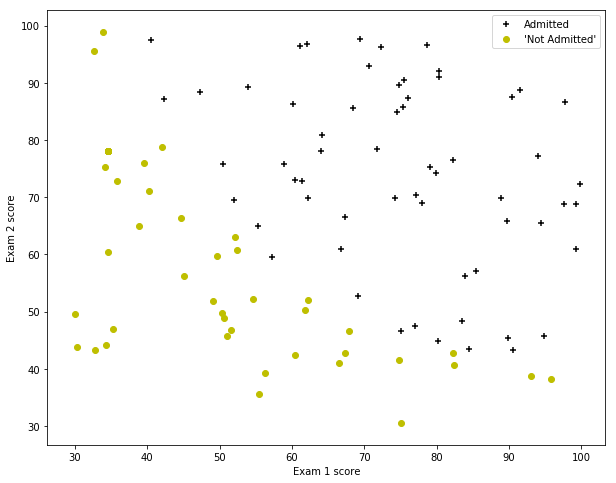

In [625]:
ax2 = fig.add_subplot(1, 1, 1)

fig